## Diabetes Prediction Model

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Feature Information 


> Pregnancies: Number of times pregnant

>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

>BloodPressure: Diastolic blood pressure (mm Hg)

>SkinThickness: Triceps skin fold thickness (mm)

>Insulin: 2-Hour serum insulin (mu U/ml)

>BMI: Body mass index (weight in kg/(height in m)^2)

>DiabetesPedigreeFunction: Diabetes pedigree function

>Age: Age (years)

>Outcome: Class variable (0 or 1)





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data as a dataframe 
dataset = pd.read_csv('./../Dataset/diabetes.csv')

## Get info about the data 

In [4]:
dataset.shape

(768, 9)

In [3]:
# Visualising top 10 records
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Basic info of columnsabs
dataset.info()# the data has been cleaned , no lissing values, represented with their correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory data analysis 

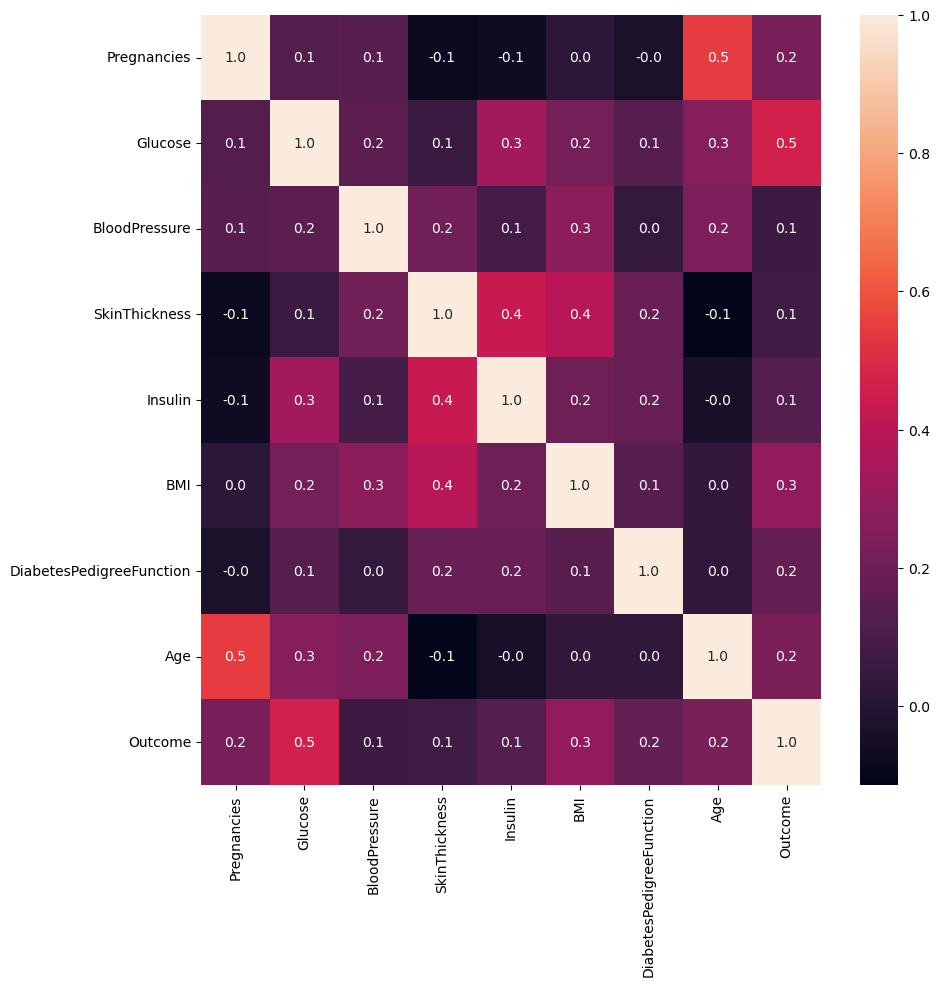

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

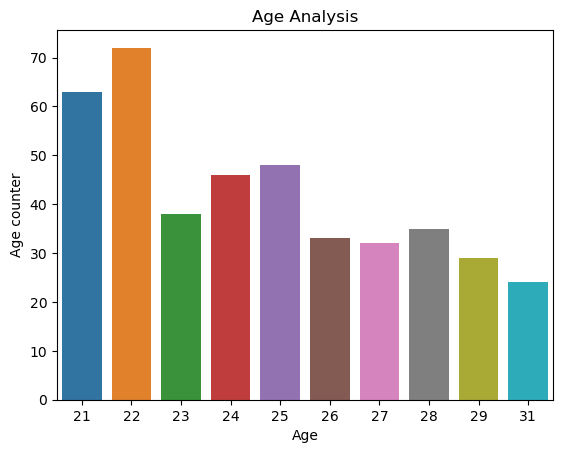

In [8]:
sns.barplot(x= dataset.Age.value_counts()[:10].index, y= dataset.Age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [9]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
countNoDisease = len(dataset[dataset.Outcome == 0])
countHaveDisease = len(dataset[dataset.Outcome == 1])
print("Percentage of patients dont have Diabetes: {:.2f}%".format((countNoDisease/(len(dataset.Outcome)))*100))
print("Percentage of patients have Diabetes: {:.2f}%".format((countHaveDisease/(len(dataset.Outcome)))*100))

Percentage of patients dont have Diabetes: 65.10%
Percentage of patients have Diabetes: 34.90%


In [11]:
young_ages = dataset[(dataset.Age>=29)&(dataset.Age<40)]
middle_ages =  dataset[(dataset.Age>=40)&(dataset.Age<55)]
elderly_ages =  dataset[(dataset.Age>=55)]

print("Young Ages", len(young_ages))
print("Middle Ages", len(middle_ages))
print("Elderly Ages", len(elderly_ages))

Young Ages 194
Middle Ages 153
Elderly Ages 54


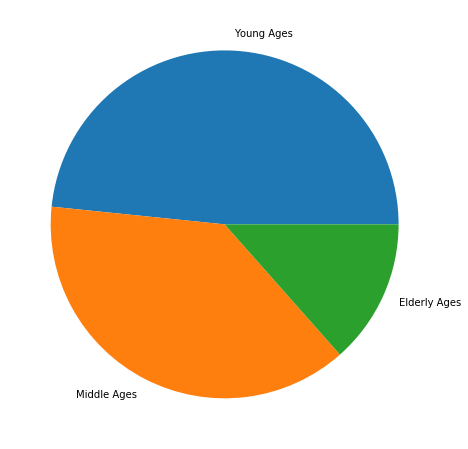

In [12]:
colors = ['blue','green','red']
explode= [1,1,1]
plt.figure(figsize=(8,8))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['Young Ages','Middle Ages','Elderly Ages'])
plt.show()

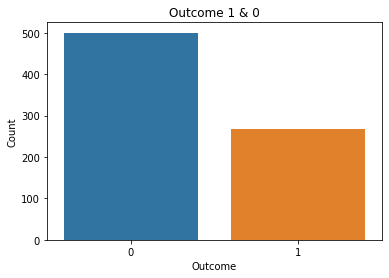

In [13]:
sns.countplot(dataset.Outcome)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome 1 & 0')
plt.show()

## Data Spliting 

In [16]:
Data = dataset.drop(['Outcome'],axis =1)
Outcome = dataset.Outcome.values

In [17]:
x_train,x_test,y_train,y_test = train_test_split(Data,Outcome, test_size=0.2, random_state=1)

##  Model Building 

# added 


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV


In [13]:
def computer_score(clf, X, y, scoring="accuracy"):
    xval = cross_val_score(clf,X,y,cv=5,scoring=scoring)
    return np.mean(xval)#Cross validation to check for biasness and variance


In [14]:
# testing different Base models 
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]

In [22]:
for model in models :
    print(f"Cross-validation od : {model.__class__}")
    score = computer_score(clf=model,X=Data,y=Outcome,scoring="accuracy")
    print(f"CV score = {score}")
    print("============================")

Cross-validation od : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.7695696460402341
Cross-validation od : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.7656650539003481
Cross-validation od : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.759205500381971
Cross-validation od : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.7591715474068416


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(Data,Outcome,test_size=0.2, random_state=0)

In [31]:
# using logistic regression classifier 
model = logreg.fit(X_train,y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
# check the prediction precision and accuracy 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [35]:
# Saving the model with pickle 
import pickle 
# save the model to disk 
model_name = "diabetes_model.pickle"
pickle.dump(model, open(model_name,'wb'))
print("Finished saving model ....")

Finished saving model ....
